<a href="https://colab.research.google.com/github/shairatabassum/MachineLearning_python/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes Classifier**

The **Naive Bayes Classifier** is based on the **Bayes Theorem** which states that,

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

So, if this theorem is applied to independent variable **X** and dependent variable **y**, then,

$P(y|X) = \frac{P(X|y) \cdot P(t)}{P(X)}$, where **X** is a feature vector $(x_1, x_2, x_3, ..., x_n)$

**Characteristics:**
*  In Naive Bayes, all the features are mutually independent. For example, **y** = whether a person will go out to take a walk depends on $x_1$ = the sun is shining and $x_2$ = the person is healthy. Here, both the features $x_1$ and $x_2$ are mutually independent but they equally contribute to calculate the probability of output **y**.
*  $P(y|X)$ is called **posterior probability**, $P(x_n|y)$ is called **class conditional probability**, **P(y)** is called the **prior probability** of y and P(X) is called the **prior probability** of X. 
*  Given the **posterior probability**, the naive bayes classifier selects the class with the highest probability.

$y = argmax_y P(y|X)$

$y = argmax_y \frac{P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y) \cdot P(y)}{P(X)}$

$y = argmax_y P(x_1|y) \cdot P(x_2|y) \cdot ... \cdot P(x_n|y) \cdot P(y)$

Since all the probability values will be between 0 and 1, multiplying a lot of such values will be a very small number. This might create an overflow problem which can be prevented by using **log** functions.

$y = argmax_y \log(P(x_1|y)) + \log(P(x_2|y)) + ... + \log(P(x_n|y)) + \log(P(y))$

The **class conditional probability** can be calculated using a **Gaussian Distribution**. 

$ P(x_i|y) = {\frac{1}{\sqrt{2 \pi \sigma^2_y}} \cdot \exp (- \frac{(x_i - \mu_y)^2}{2 \sigma^2_y})}$

### **Import Dataset**

In [116]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
import seaborn as sns
import sklearn
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [117]:
# load dataset
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# print data samples
print('X: ', X_train.shape)
print('Sample of X:', X_train[0])
print('y: ', y_train.shape)
print('Sample of y:', y_train[0])

X:  (800, 10)
Sample of X: [-0.63950524 -0.23584751 -0.28840218  0.86825272 -1.15544241 -0.71766427
 -0.51608355 -0.68415371  1.18943464 -0.31669551]
y:  (800,)
Sample of y: 1


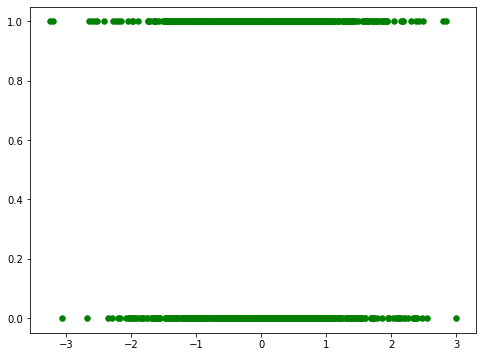

In [118]:
# plot data samples
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='g', s=30)
plt.show()

### **Naive Bayes Classifier from scratch**

In [119]:
class NaiveBayesModel:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [120]:
# train the model
nb = NaiveBayesModel()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

In [121]:
# model accuracy
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

print('Accuracy: ', round(accuracy(y_test, predictions)*100, 2), '%')

Accuracy:  96.5 %


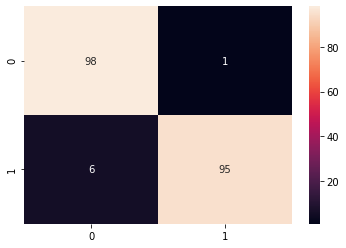

In [122]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [123]:
# classification report
print(classification_report(y, nb.predict(X)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       502
           1       0.97      0.93      0.95       498

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



### **Naive Bayes Classifier using scikit-learn**

**Gaussian Naive Bayes:** A variant of Naive Bayes which uses Gaussian Distribution. It performs best while dealing with continuous data.

In [124]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100, 2), '%')

Accuracy: 96.5 %


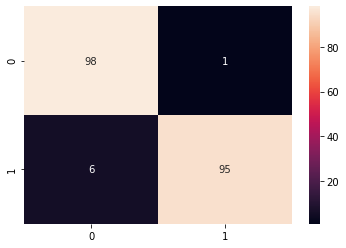

In [125]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [126]:
# classification report
print(classification_report(y, gnb.predict(X)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       502
           1       0.97      0.93      0.95       498

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



**Bernoulli Naive Bayes:** Another variant of Naive Bayes which is basically used for discrete data, where features are only in binary form.

In [127]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100, 2), '%')

Accuracy: 95.0 %


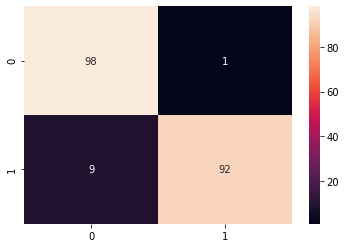

In [128]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [129]:
# classification report
print(classification_report(y, bnb.predict(X)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       502
           1       0.96      0.92      0.94       498

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



**Multinomial Naive Bayes:** A variant of Naive Bayes which considers a feature vector where a given term represents the number of times it appears or very often i.e. frequency.  It is a widely used classifier for document classification which keeps the count of frequent words present in the documents. It may lead to poor performance while dealing with binary classification problems.

In [130]:
X_train = np.where(X_train > 0.0, X_train, X_train*(-1.0))
X_test = np.where(X_test > 0.0, X_test, X_test*(-1.0))

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100, 2), '%')

Accuracy: 60.5 %


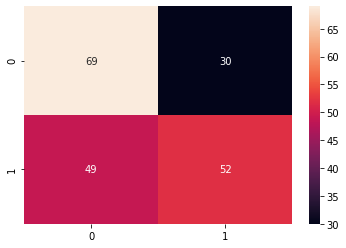

In [131]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [132]:
# classification report
print(classification_report(y, mnb.predict(X)))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       502
           1       0.51      0.45      0.47       498

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000

